#### Projects -Agricultural Product Distribution Forecasting: Predicting Demand to Optimize Harvest Schedules

Business Overview/Problem
GreenSeason Farms faces a critical business challenge related to optimizing harvest schedules and distribution. The primary issues the company encounters include:

✓ Inefficient Harvesting: The current harvesting process is primarily based on traditional seasonal patterns and historical data, resulting in inefficiencies. This approach leads to underutilization of resources during peak seasons and overproduction during off-peak times.
✓ Demand Variability: The demand for agricultural products fluctuates due to factors such as weather conditions, consumer preferences, and market trends. GreenHarvest Farms often struggles to accurately predict these variations, leading to issues with overstocking or understocking products.
✓ Shelf Life Management: Different crops have varying shelf lives, and ensuring products reach customers at their peak freshness is a challenge. Misjudging harvest times can lead to product wastage and reduced profits.
✓ Transportation Optimization: The distribution network encompasses multiple destinations across the country. Finding the optimal routes and delivery schedules to minimize transportation costs while meeting demand is a complex problem.


Aim of the Project


The objectives of the Agricultural Product Distribution Forecasting project are as follows:

✓ Develop a robust demand forecasting model that accurately predicts product demand based on historical data, weather conditions, and market trends.
✓ Identify key parameters that affect production demand.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


# Data Collection

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset amdari.csv')

# Data Exploration and Understanding 1

In [8]:
df.head()

,Date,Product,Quantity_Sold,Revenue,Temperature_Celsius,Rainfall_mm,Location,Transportation_Cost,Labor_Cost,Customer,Quality_Score,Inventory_Level
0,1/1/15,Strawberries,690.0,70.298339,9.680289,0.077279,Field C,20,13.771809,Customer B,0.769340,3608.0
1,1/1/15,Apples,354.0,599.863944,9.680289,0.077279,Field A,50,9.702670,Customer C,0.861953,3982.0
2,1/1/15,Tomatoes,275.0,199.249505,9.680289,0.077279,Field C,20,22.356498,Customer C,0.861953,3708.0
3,1/1/15,Apples,1079.0,1136.111770,9.680289,0.077279,Field A,50,15.691418,Customer A,0.876056,3455.0
4,1/1/15,Strawberries,1008.0,111.653303,9.680289,0.077279,Field B,30,17.473353,Customer B,0.769340,1504.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28388 entries, 0 to 28387
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 28388 non-null  object 
 1   Product              28388 non-null  object 
 2   Quantity_Sold        28382 non-null  float64
 3   Revenue              28388 non-null  float64
 4   Temperature_Celsius  28377 non-null  float64
 5   Rainfall_mm          28377 non-null  float64
 6   Location             28388 non-null  object 
 7   Transportation_Cost  28388 non-null  int64  
 8   Labor_Cost           28388 non-null  float64
 9   Customer             28388 non-null  object 
 10  Quality_Score        28388 non-null  float64
 11  Inventory_Level      28382 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.6+ MB


In [10]:
df.describe()

,Quantity_Sold,Revenue,Temperature_Celsius,Rainfall_mm,Transportation_Cost,Labor_Cost,Quality_Score,Inventory_Level
count,28382.000000,28388.000000,28377.000000,28377.000000,28388.000000,28388.000000,28388.000000,28382.000000
mean,609.197097,405.584444,20.024600,7.393332,33.465901,17.573430,0.835909,2617.164012
std,316.521726,485.206130,8.701719,4.316396,12.466448,7.232465,0.047362,1189.840946
min,41.000000,3.546003,5.011709,0.003963,20.000000,5.000083,0.769340,66.000000
25%,334.000000,94.572138,12.435564,3.621238,20.000000,11.289710,0.769340,1621.000000
50%,607.500000,256.513966,20.124216,7.358936,30.000000,17.586134,0.861953,2630.000000
75%,884.000000,513.624224,27.544882,11.062843,50.000000,23.869033,0.876056,3597.000000
max,1195.000000,3382.034941,34.985404,14.997572,50.000000,29.998989,0.876056,5172.000000


In [11]:
df.isna().sum()

,0
Date,0
Product,0
Quantity_Sold,6
Revenue,0
Temperature_Celsius,11
Rainfall_mm,11
Location,0
Transportation_Cost,0
Labor_Cost,0
Customer,0


In [12]:
# To know how to handle the columns with missing values, check for outliers
cols = df[['Quantity_Sold','Temperature_Celsius','Rainfall_mm','Inventory_Level']].columns # Get columns that has missing values

for col in cols:
    z = np.abs(stats.zscore(df[col],nan_policy='omit'))
    outliers = df[col][z > 3]
    print(f'{col} has {len(outliers)} outliers')


# Also check for skewness
for col in cols:
    print(f'{col} has skewness of {df[col].skew()}')

Quantity_Sold has 0 outliers
Temperature_Celsius has 0 outliers
Rainfall_mm has 0 outliers
Inventory_Level has 0 outliers
Quantity_Sold has skewness of 0.007049968334628765
Temperature_Celsius has skewness of -0.0052446336018828164
Rainfall_mm has skewness of 0.017580193040890726
Inventory_Level has skewness of -0.006928239182168006


In [13]:
# Fill in the missing values
for col in cols:
  df[col].fillna(df[col].mean(), inplace=True)

# Confirm the missing values
df.isna().sum().sum()

0

### Univariate Analysis

We will analyse the distribution of variable individually, for;

 - Numerical variables,
 - Categorical variables.


## Numerical variables,

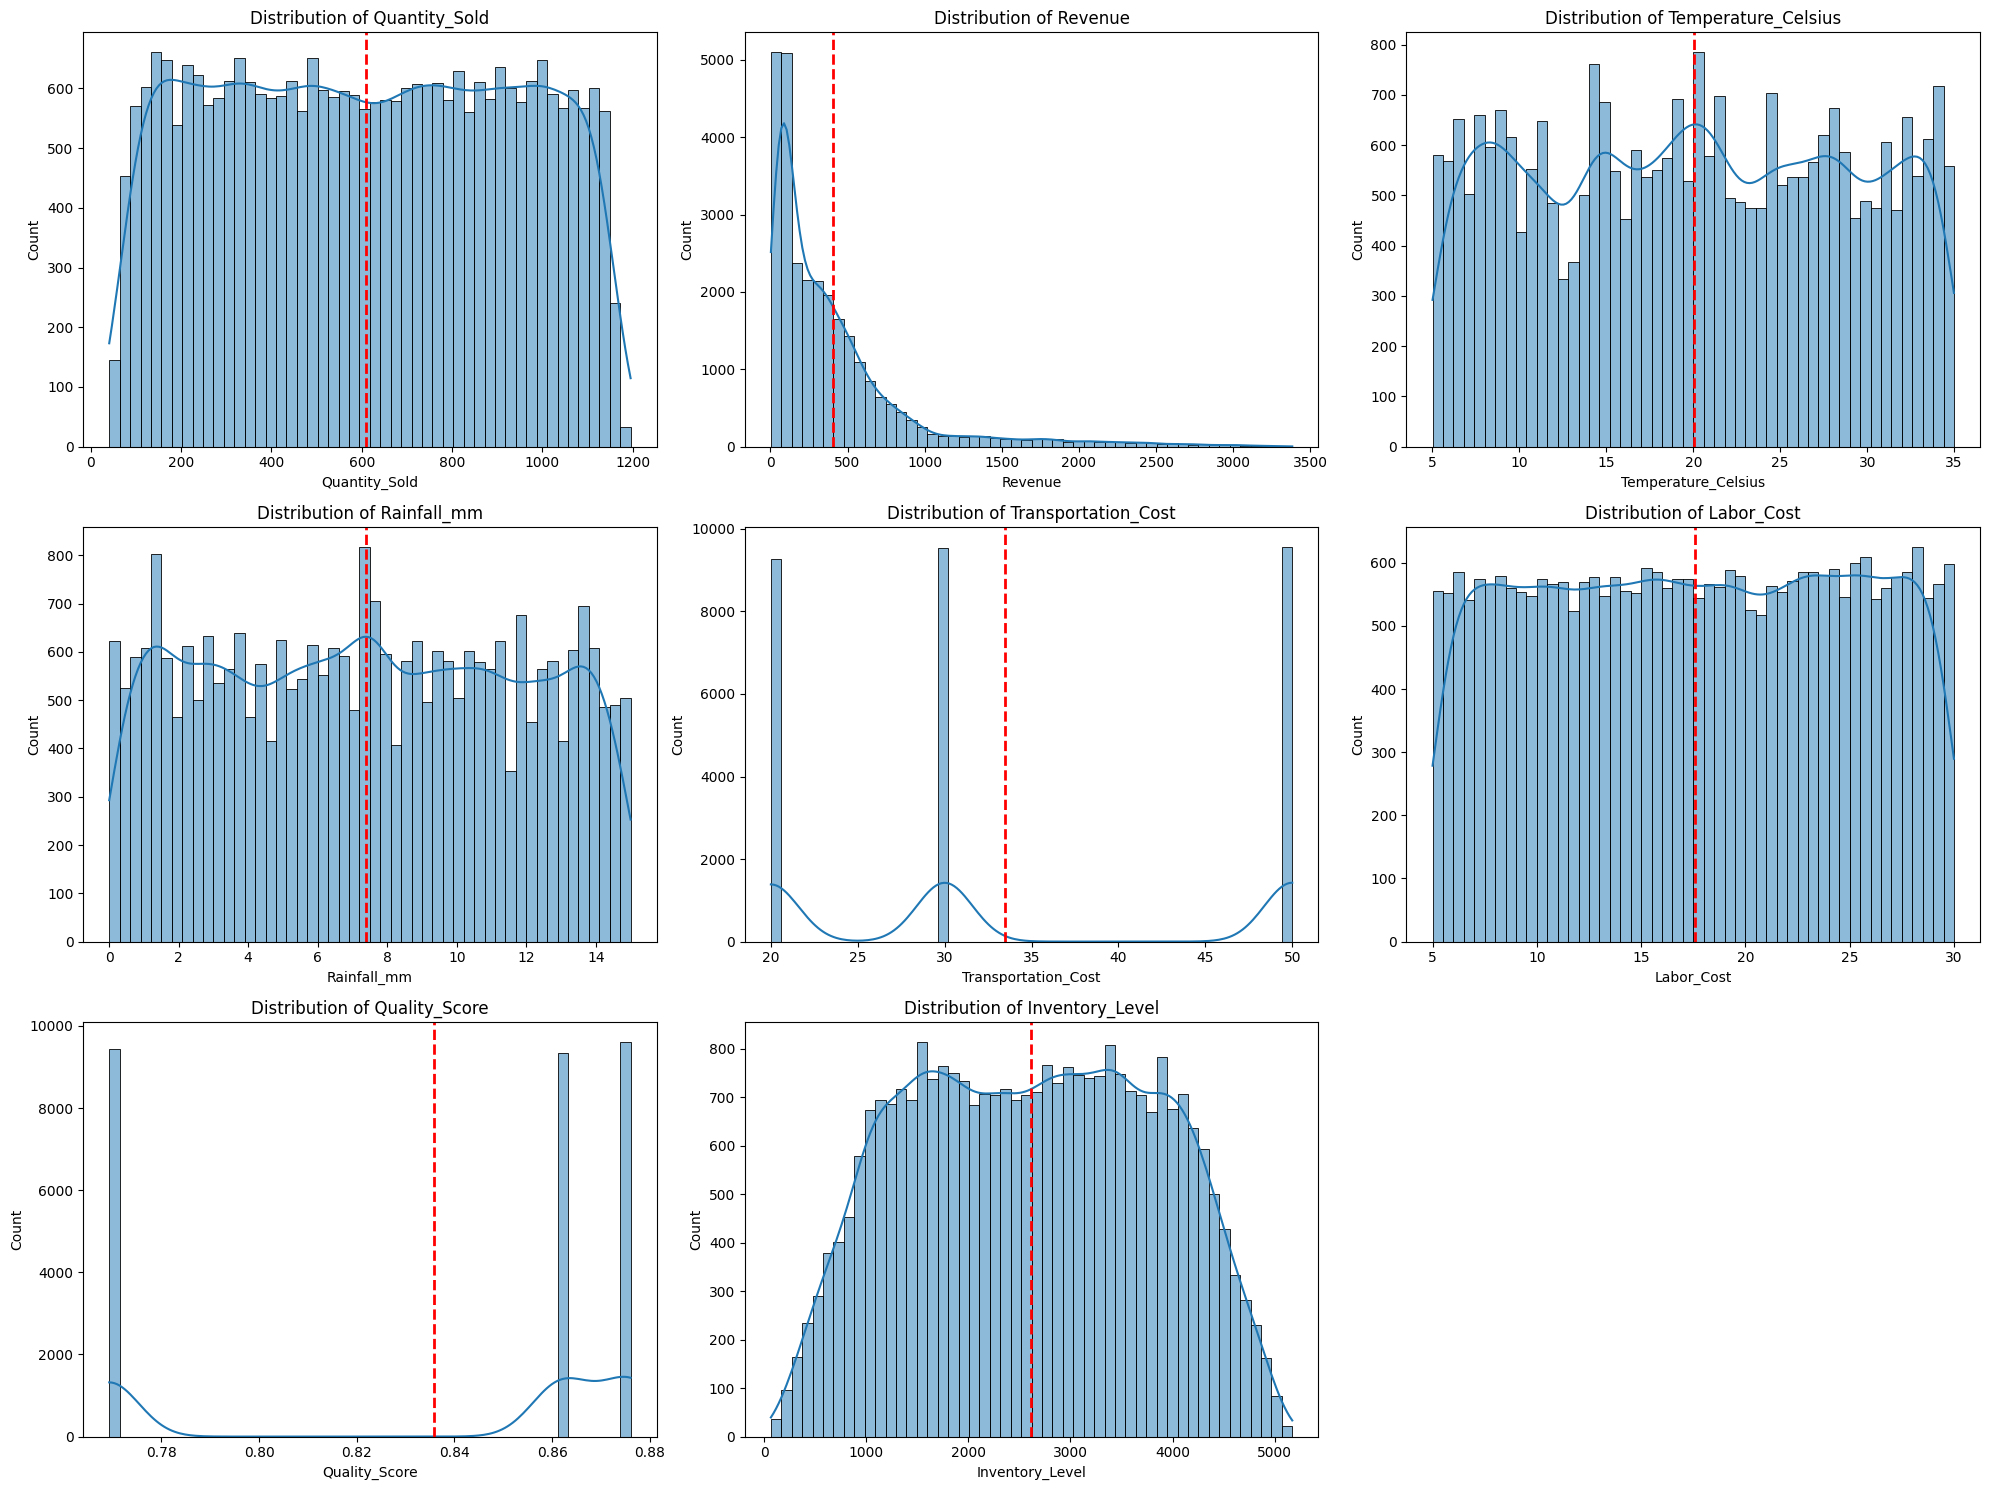

In [14]:
plt.figure(figsize=(20,15))

numeric_vars = ['Quantity_Sold',
               'Revenue',
               'Temperature_Celsius',
               'Rainfall_mm',
               'Transportation_Cost',
               'Labor_Cost',
               'Quality_Score',
               'Inventory_Level']

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=50)
    plt.axvline(df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


## Categorical variables.

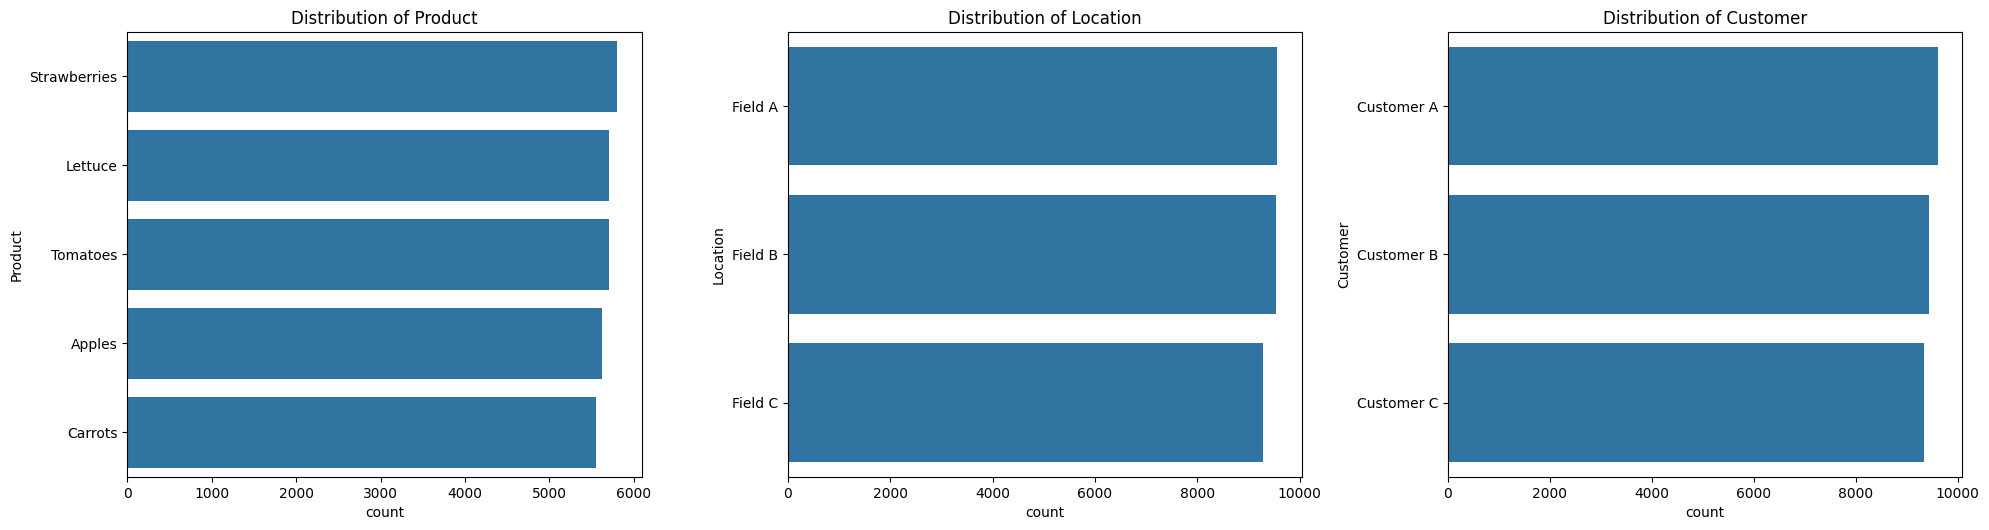

In [15]:
plt.figure(figsize=(20,10))

categorical_vars = ['Product', 'Location','Customer']
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, y=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


### Biivariate Analysis

We look at pair of variables,by looking at:
 - pairs of numerical variables,
 - numerical and categorical variables,
 - pairs of categorical variables.



 ### Bivariate Analysis: Numerical Variables

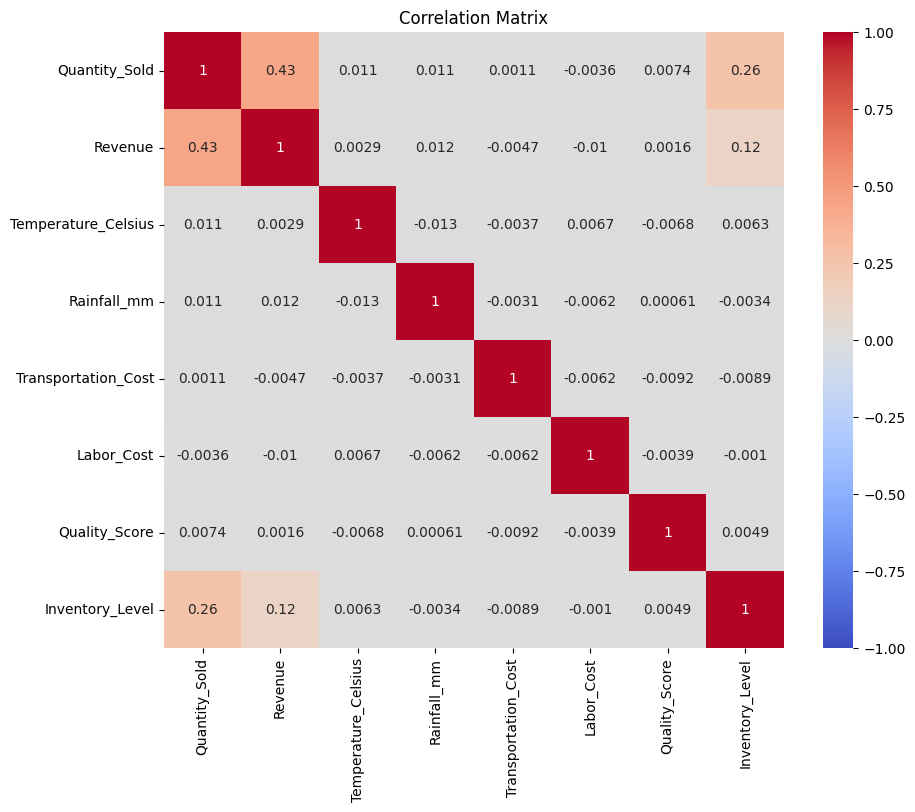

In [16]:
# Starting with ploting the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Bivariate Analysis: Numerical and Categorical Variables

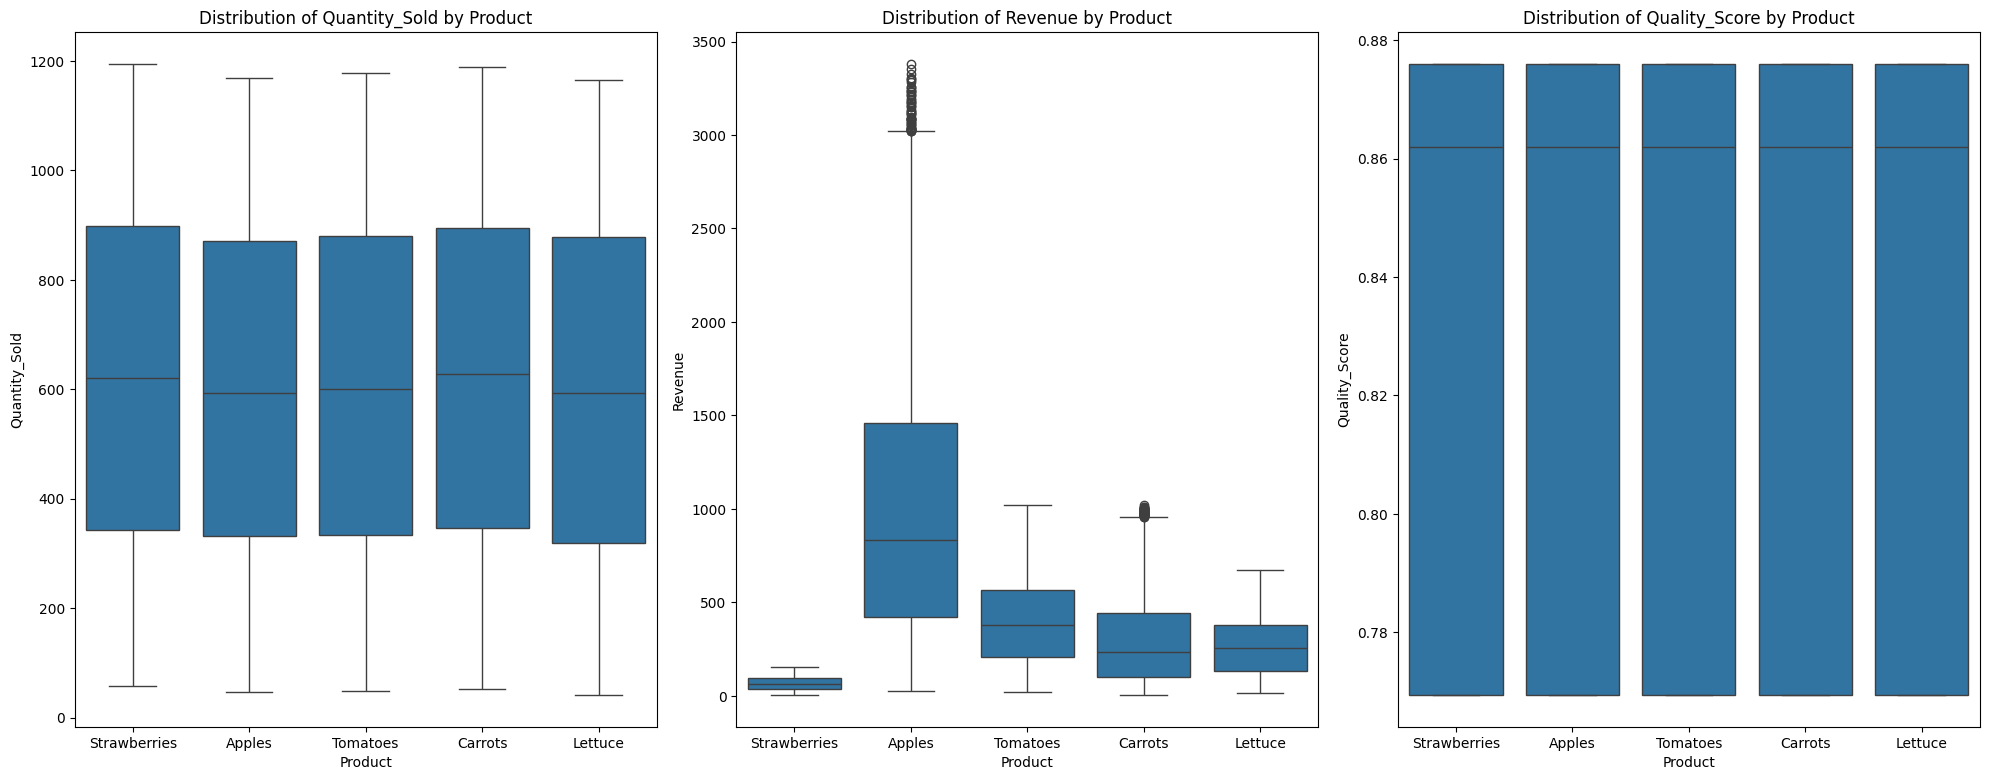

In [17]:
# Analysing Product aganist Revenue,Quantity sold and Quanity score
plt.figure(figsize=(20, 15))

key_numercal_vars = ['Quantity_Sold','Revenue','Quality_Score']

for i, var in enumerate(key_numercal_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Product', y=var)
    plt.title(f'Distribution of {var} by Product')

plt.tight_layout()
plt.show()



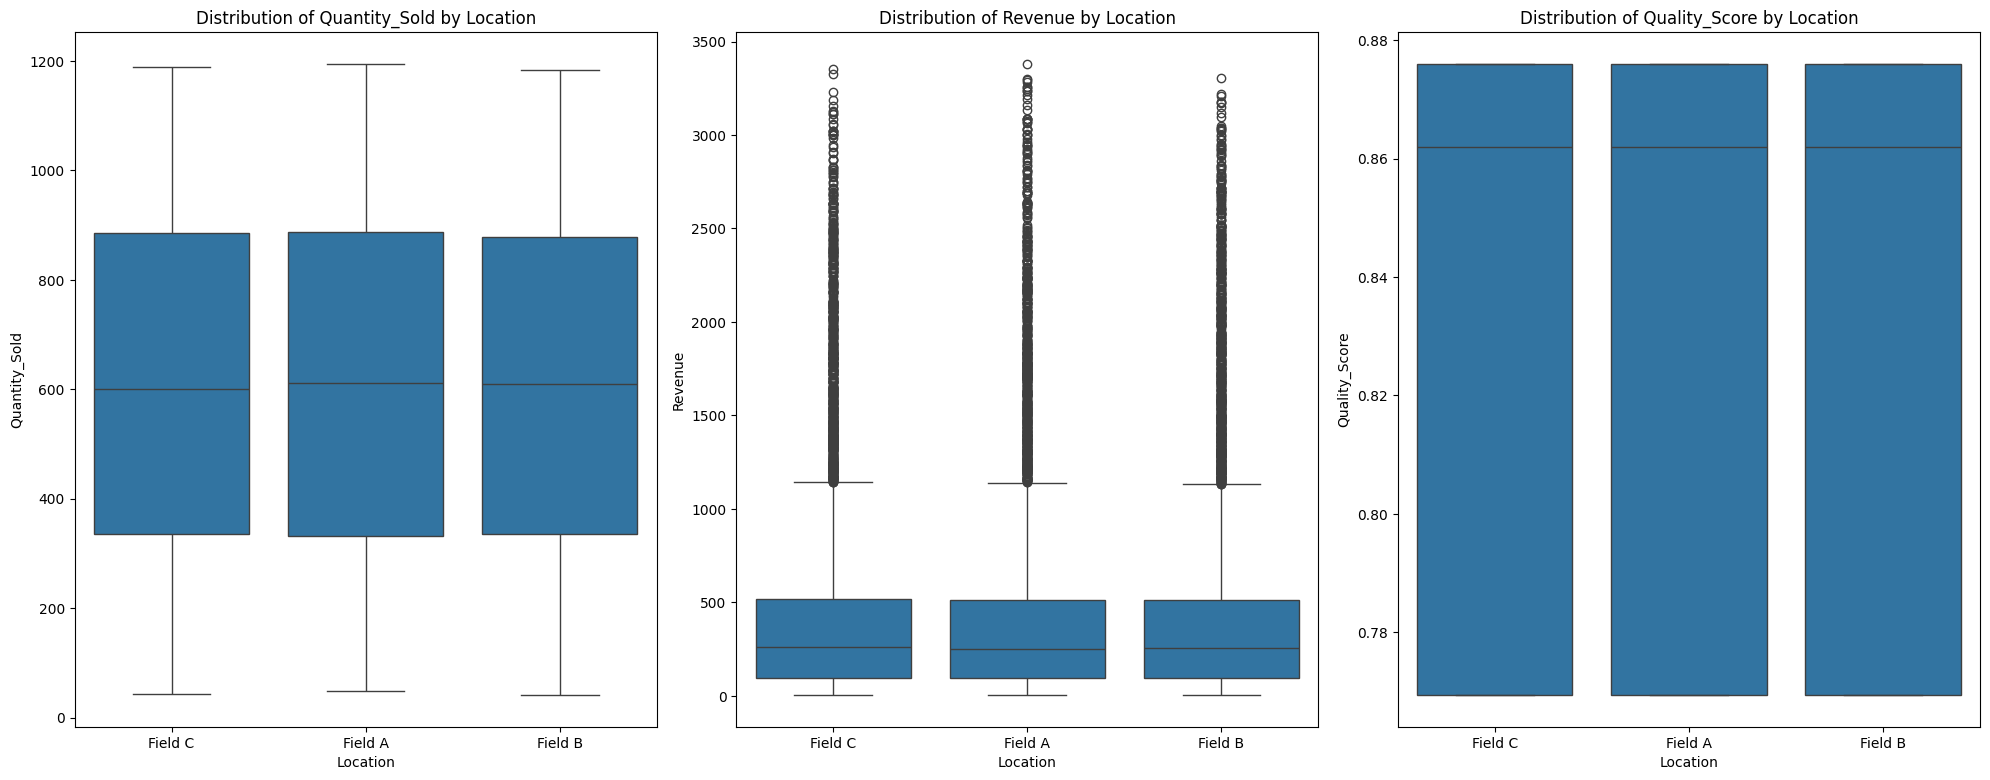

In [18]:
# Analysing Location aganist Revenue,Quantity sold and Quanity scor
plt.figure(figsize=(20, 15))
for i, var in enumerate(key_numercal_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Location', y=var)
    plt.title(f'Distribution of {var} by Location')

plt.tight_layout()
plt.show()

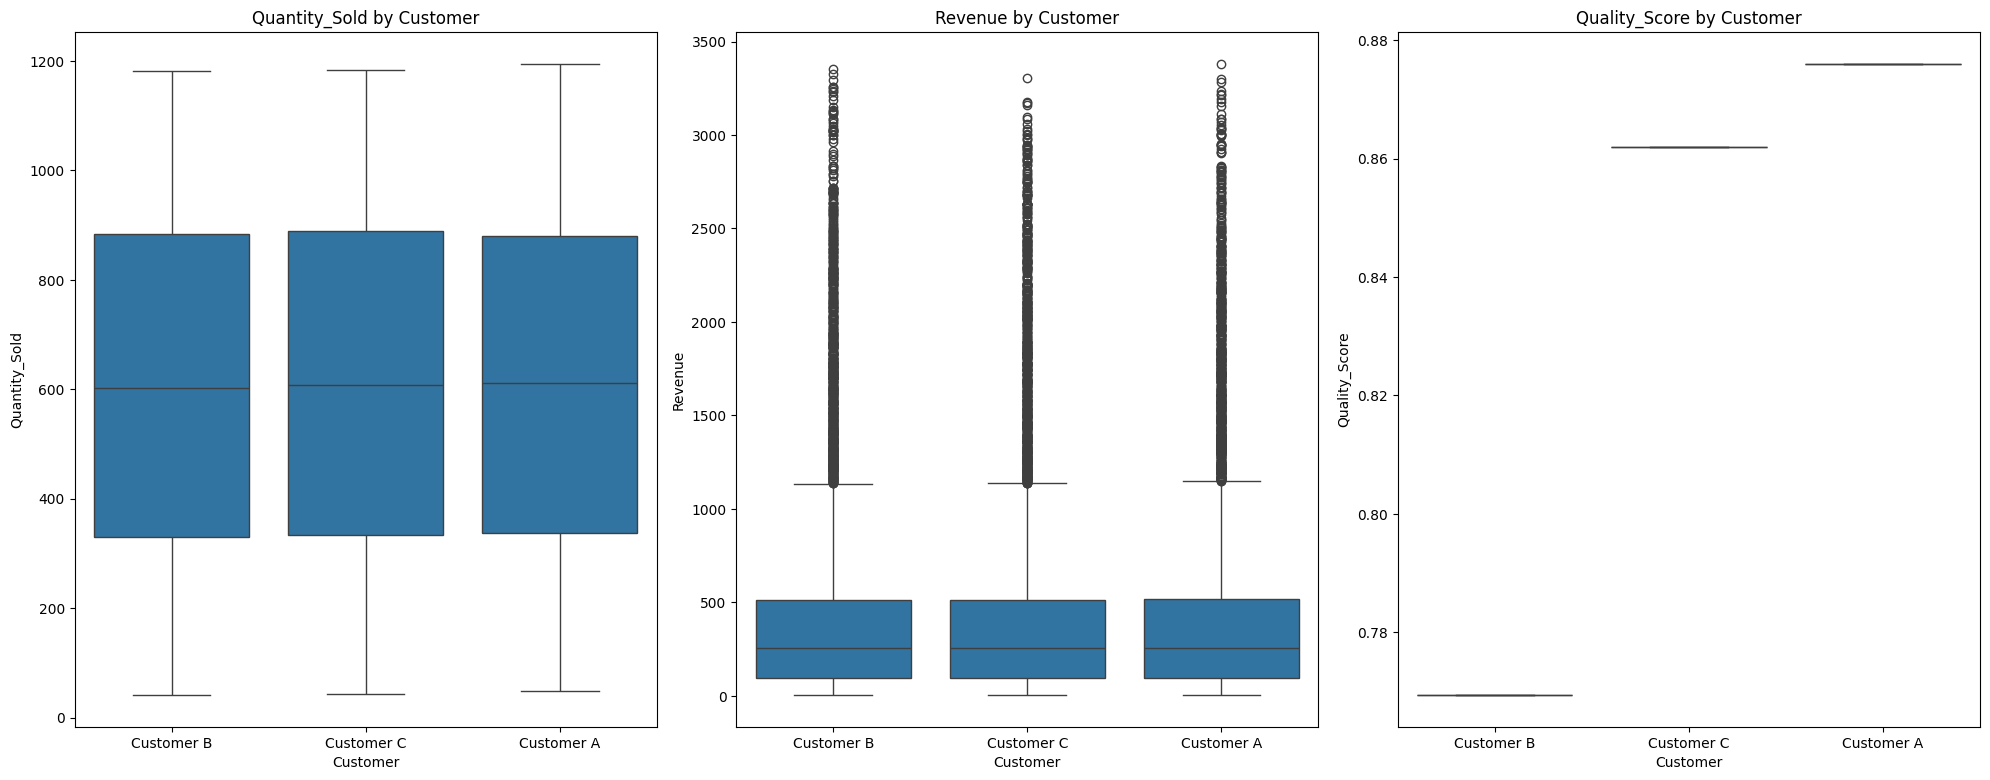

In [19]:
# Analysing Customer aganist Revenue,Quantity sold and Quanity score
plt.figure(figsize=(20, 15))
for i, var in enumerate(key_numercal_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Customer', y=var)
    plt.title(f'{var} by Customer')

plt.tight_layout()
plt.show()

### Next, we visualize:

  - Total Quantity_sold per Product,
  - Total Revenue per Product,
  - Quantity_score per product.


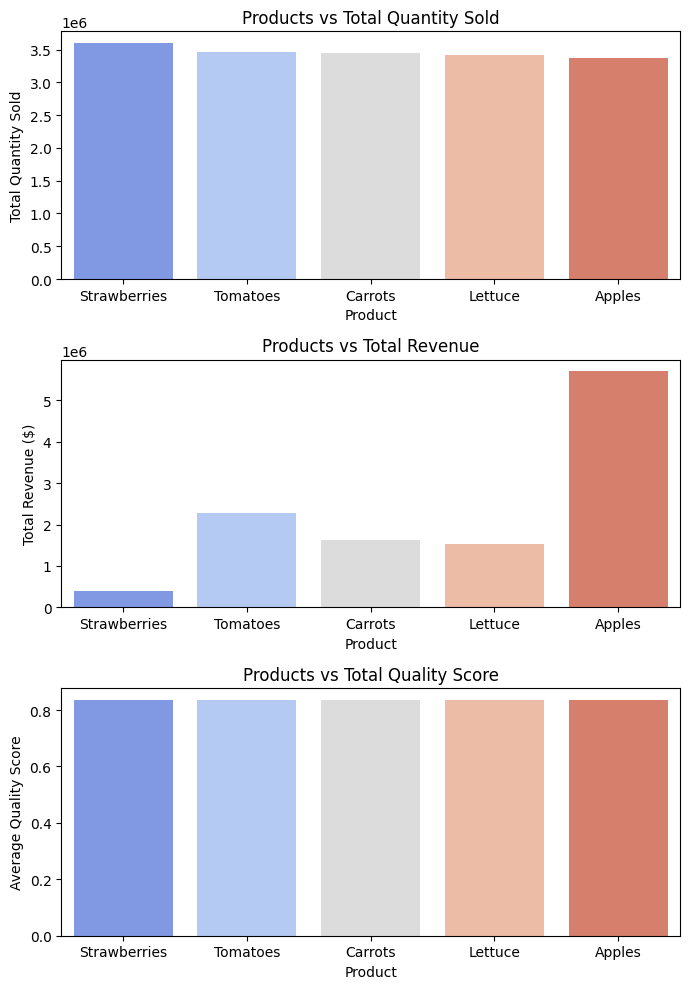

In [20]:
product_data = df.groupby('Product').agg({
    'Quantity_Sold': 'sum',
    'Revenue': 'sum',
    'Quality_Score': 'mean'}).reset_index()
product_data = product_data.sort_values(by='Quantity_Sold', ascending=False)
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

# Products vs Total quantity_sold
sns.barplot(data=product_data, y='Quantity_Sold',x='Product', ax=ax[0],palette='coolwarm')
ax[0].set_title('Products vs Total Quantity Sold')
ax[0].set_ylabel('Total Quantity Sold')
ax[0].set_xlabel('Product')

# Products vs Total Revenue
sns.barplot(data=product_data, y='Revenue',x='Product', ax=ax[1],palette='coolwarm')
ax[1].set_title('Products vs Total Revenue')
ax[1].set_ylabel('Total Revenue ($)')
ax[1].set_xlabel('Product')

# Products vs Total Quantity_score
sns.barplot(data=product_data, y='Quality_Score',x='Product', ax=ax[2],palette='coolwarm')
ax[2].set_title('Products vs Total Quality Score')
ax[2].set_ylabel('Average Quality Score')
ax[2].set_xlabel('Product')

plt.tight_layout()
plt.show()

Next, let check the total Quantity_Sold for each product per customer

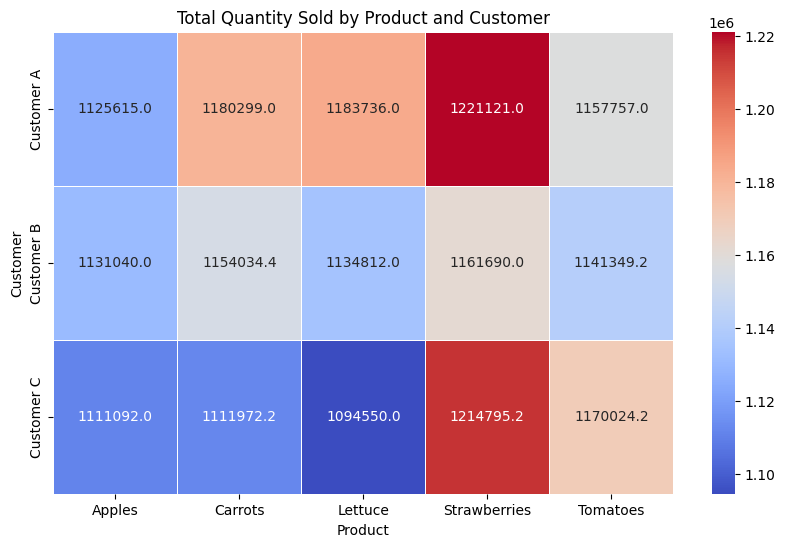

In [21]:
customer_data = df.groupby(['Customer', 'Product']).agg({'Quantity_Sold': 'sum',
                                                         'Revenue': 'sum',
                                                         'Quality_Score': 'sum'}).reset_index() # Changed 'Quantity_Score' to 'Quality_Score'
customer_pivot = customer_data.pivot(index='Customer', columns='Product', values='Quantity_Sold')

plt.figure(figsize=(10, 6))
sns.heatmap(customer_pivot, annot=True, cmap='coolwarm', fmt='.1f',linewidths=0.5)
plt.title('Total Quantity Sold by Product and Customer')
plt.xlabel('Product')
plt.ylabel('Customer')
plt.show()

### Biverite Analysis; Two Categorical Variable

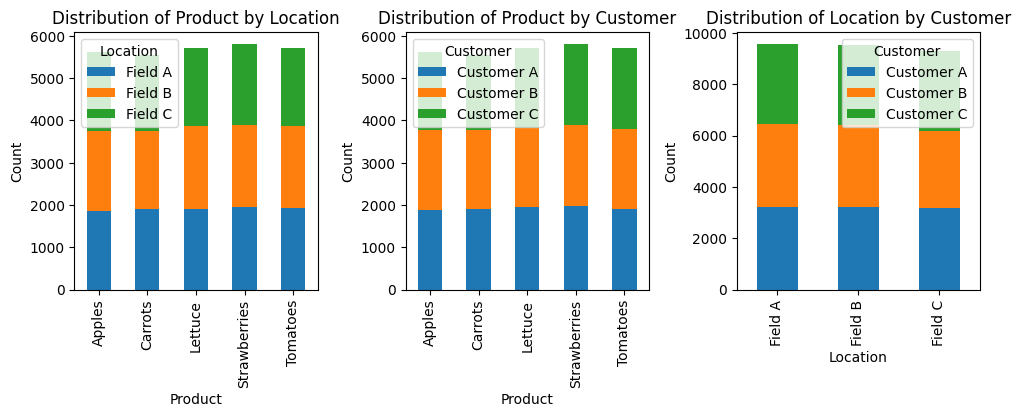

In [22]:
plt.figure(figsize=(20, 15))

pairs = [('Product', 'Location'),
                    ('Product', 'Customer'),
                    ('Location','Customer')]

for i, (p1, p2) in enumerate(pairs):
    contingency_table = pd.crosstab(df[p1], df[p2])

    ax = plt.subplot(2, 3, i+1)
    contingency_table.plot(kind='bar', stacked=True, figsize=(10,7), ax=ax)
    plt.title(f'Distribution of {p1} by {p2}')
    plt.ylabel('Count')
    plt.xlabel(p1)

plt.tight_layout()
plt.show()


### Multivariate Analysis

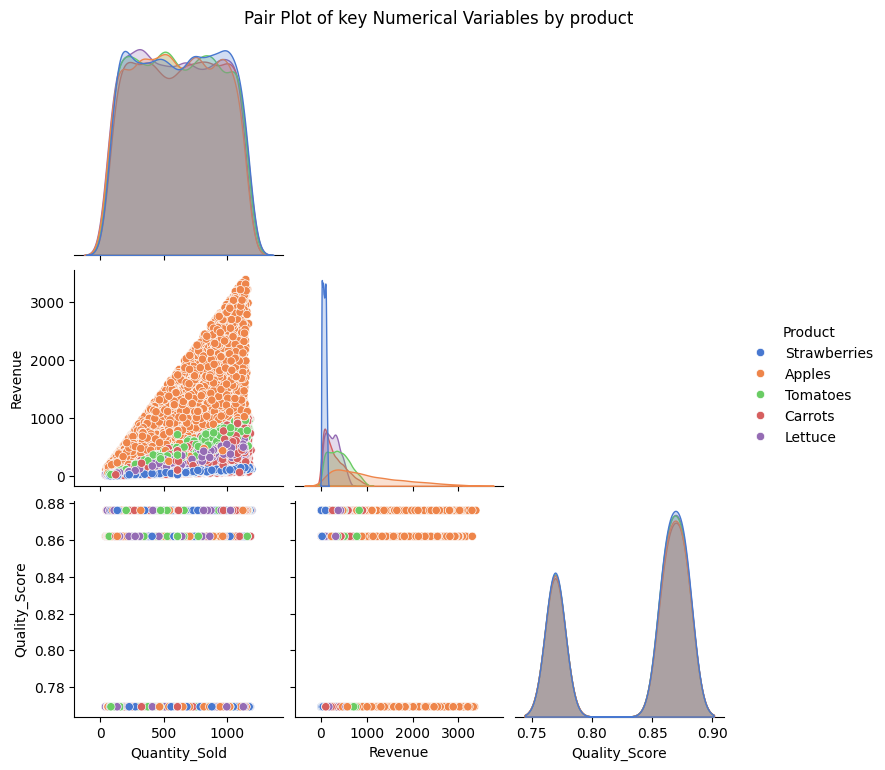

In [23]:
pair_plot = sns.pairplot(df, hue='Product', vars=key_numercal_vars, palette='muted',corner=True)
pair_plot.fig.suptitle('Pair Plot of key Numerical Variables by product', y=1.02)

plt.show()

#### **Data Exploration and Understanding 3**


How the quantity_sold and revenue vary daily

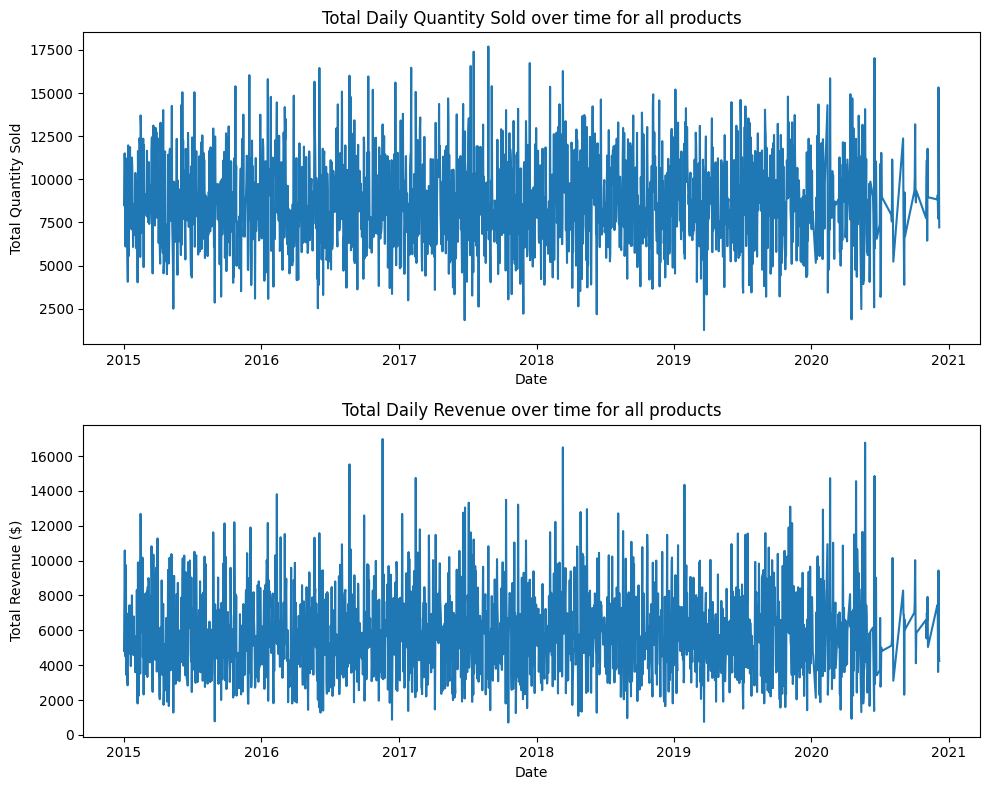

In [24]:
# Convert the data to datetime format
df['Date'] = pd.to_datetime(df['Date'])

time_based_date = df.groupby('Date').agg({
    'Quantity_Sold': 'sum',
    'Revenue': 'sum'
}).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Quantity Sold over time
sns.lineplot(data=time_based_date, x='Date', y='Quantity_Sold', ax=ax[0])
ax[0].set_title('Total Daily Quantity Sold over time for all products')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue over time
sns.lineplot(data=time_based_date, x='Date', y='Revenue', ax=ax[1])
ax[1].set_title('Total Daily Revenue over time for all products')
ax[1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()

###How the quantity_sold and revenue vary weekly

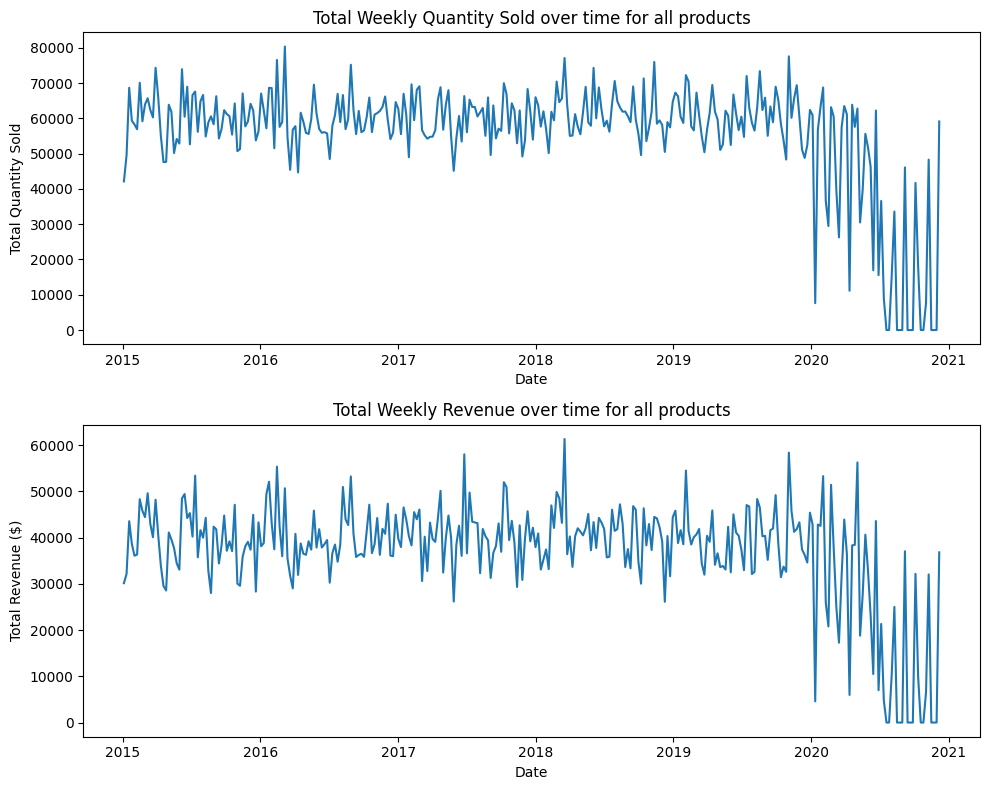

In [25]:
time_based_date = df.groupby('Date').agg({
    'Quantity_Sold': 'sum',
    'Revenue': 'sum'
}).reset_index()

time_based_date = time_based_date.set_index('Date').resample('W').sum().reset_index()
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Quantity Sold over time
sns.lineplot(data=time_based_date, x='Date', y='Quantity_Sold', ax=ax[0])
ax[0].set_title('Total Weekly Quantity Sold over time for all products')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue over time
sns.lineplot(data=time_based_date, x='Date', y='Revenue', ax=ax[1])
ax[1].set_title('Total Weekly Revenue over time for all products')
ax[1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()


How the quantity_sold and revenue vary monthly

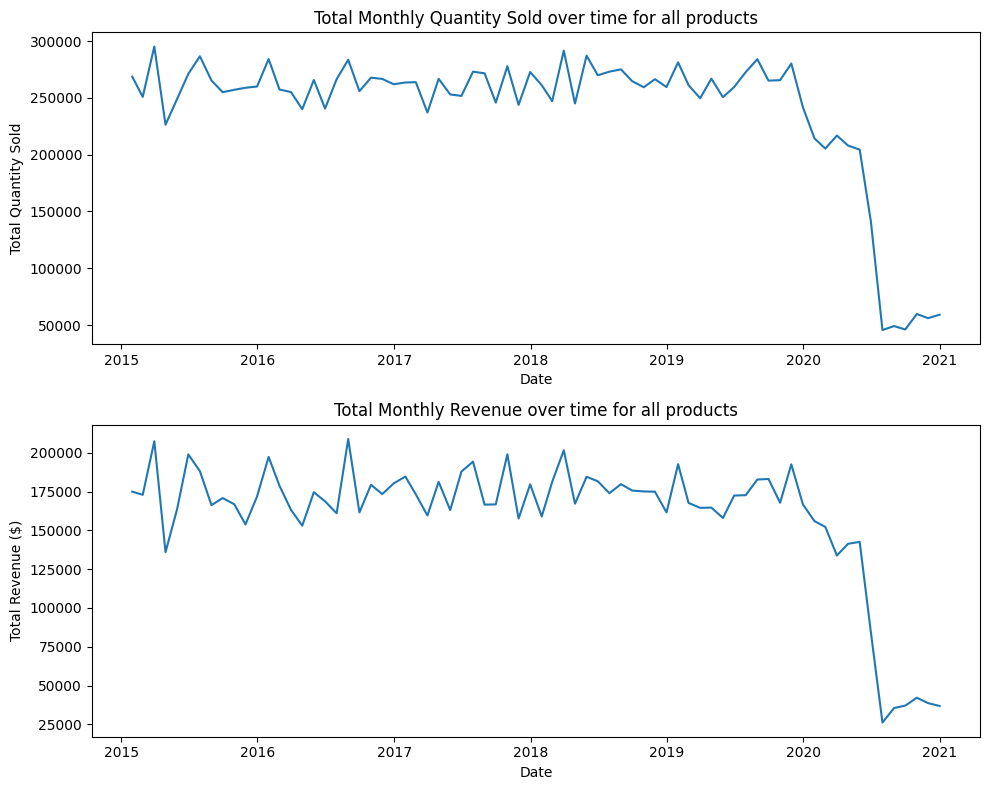

In [26]:
time_based_date = df.groupby('Date').agg({
    'Quantity_Sold': 'sum',
    'Revenue': 'sum'
}).reset_index()

time_based_date = time_based_date.set_index('Date').resample('M').sum().reset_index()
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Quantity Sold over time
sns.lineplot(data=time_based_date, x='Date', y='Quantity_Sold', ax=ax[0])
ax[0].set_title('Total Monthly Quantity Sold over time for all products')
ax[0].set_ylabel('Total Quantity Sold')

# Revenue over time
sns.lineplot(data=time_based_date, x='Date', y='Revenue', ax=ax[1])
ax[1].set_title('Total Monthly Revenue over time for all products')
ax[1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()

###Plot monthly quantity sol and revenue per products

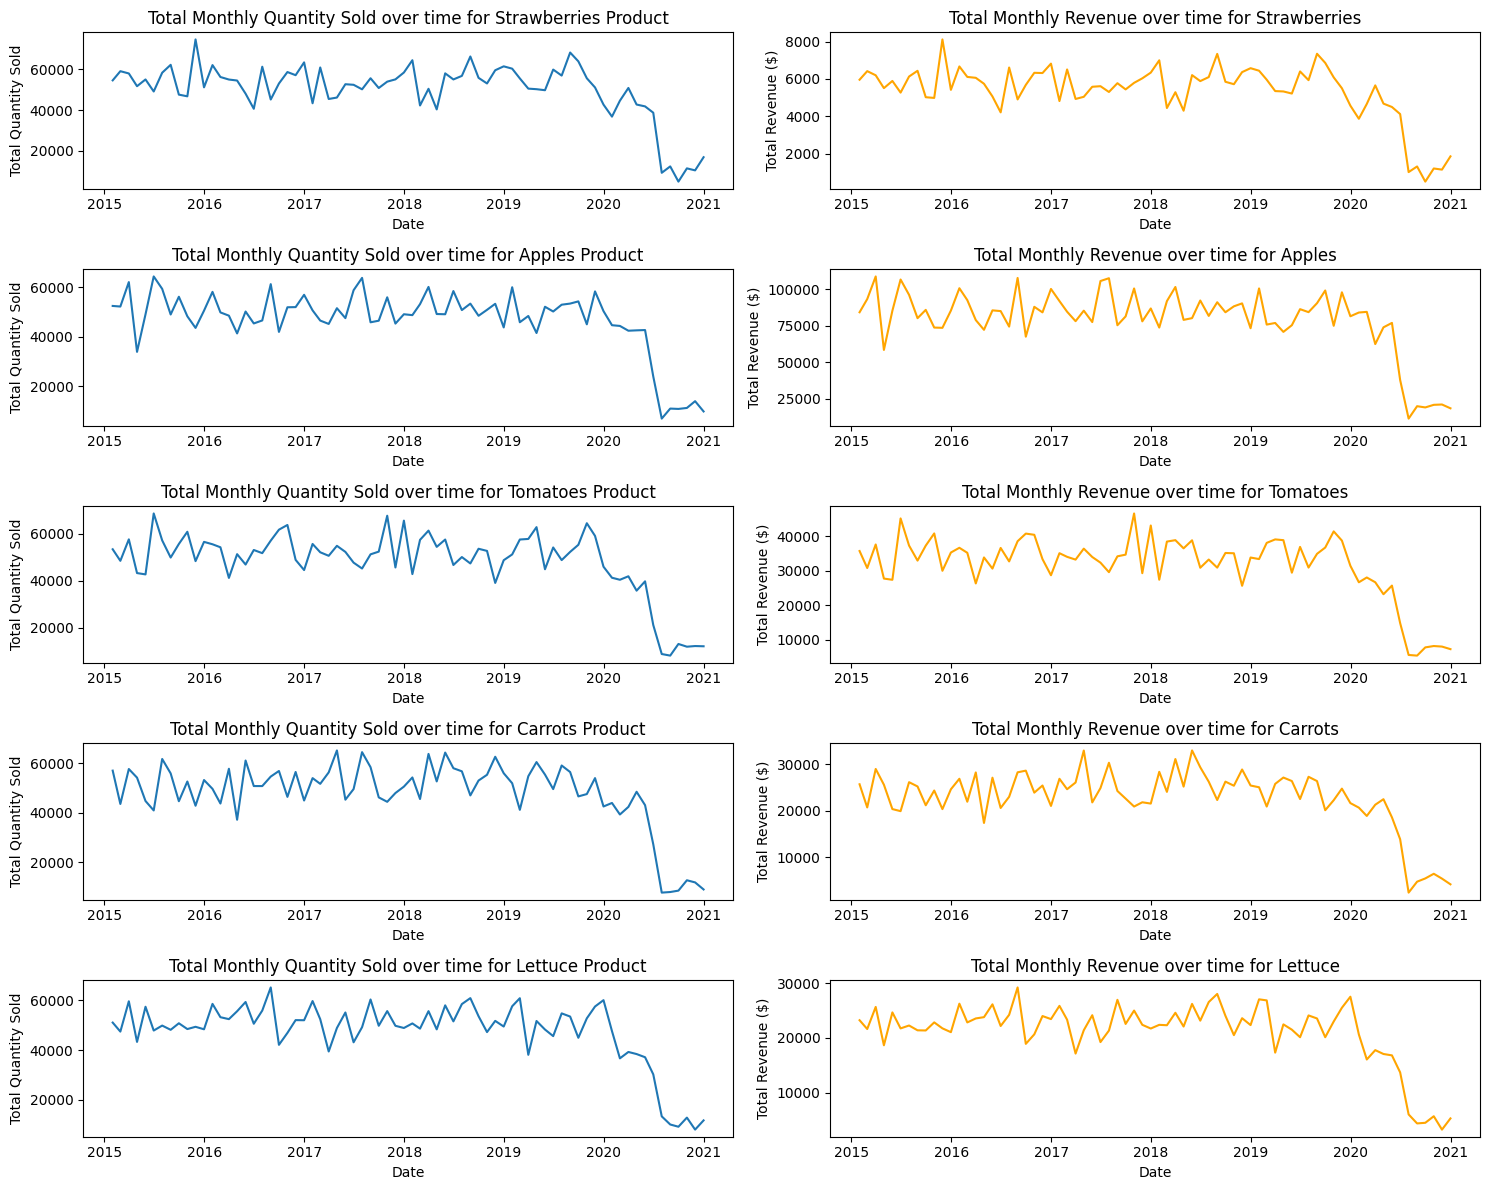

In [27]:
products = df['Product'].unique()
fig, ax = plt.subplots(len(products), 2, figsize=(15, 12))

time_based_date = df.groupby('Date').agg({'Quantity_Sold': 'sum','Revenue': 'sum'}).reset_index()

for i, product in enumerate(products):
    time_based_data = df[df['Product'] == product]
    #time_based_data = time_based_data.groupby('Date').agg({'Quantity_Sold': 'sum',
                                                          #'Revenue': 'sum'}).reset_index()
    time_based_data = time_based_data.set_index('Date').resample('M').sum().reset_index()

    # Quantity sold over time
    sns.lineplot(data=time_based_data, x='Date', y='Quantity_Sold', ax=ax[i, 0])
    ax[i, 0].set_title(f'Total Monthly Quantity Sold over time for {product} Product')
    ax[i, 0].set_ylabel('Total Quantity Sold')

    # Revenue over time
    sns.lineplot(data=time_based_data, x='Date', y='Revenue', ax=ax[i, 1], color='orange')
    ax[i, 1].set_title(f'Total Monthly Revenue over time for {product}')
    ax[i, 1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()

#### Feature Engineering
We are going to split the data into train and test sets

In [28]:
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [29]:
train_data = dict()
test_data = dict()

for product in products:
    df_product = df[df['Product'] == product]

    df_product = df_product.groupby('Date').agg({'Quantity_Sold':'sum',
                                                 'Revenue':'sum'}).reset_index()

    df_product = df_product.set_index('Date').resample('M').sum().reset_index()

    train_data[product]  = df_product[df_product['Date'].dt.year < 2019].reset_index()
    test_data[product]  = df_product[df_product['Date'].dt.year >= 2019].reset_index()


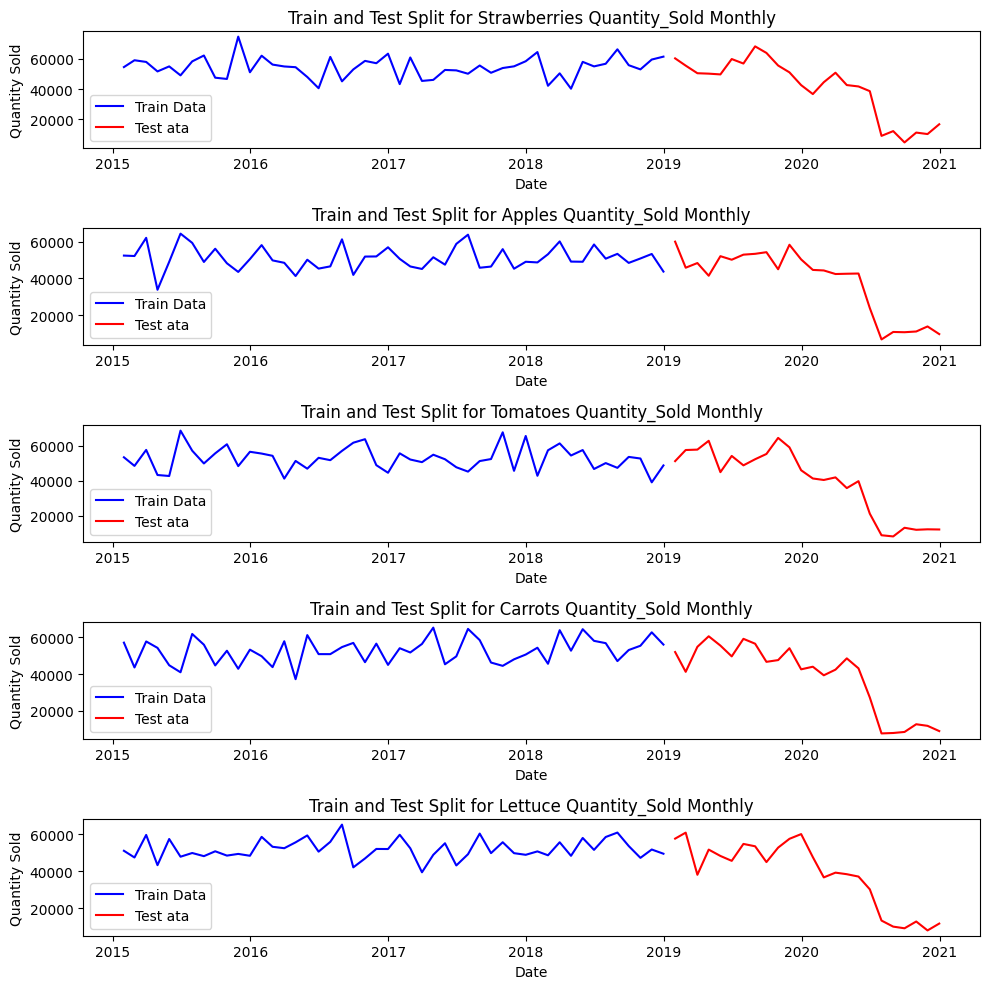

In [30]:
# Visualize the split
fig, ax = plt.subplots(len(products), 1, figsize=(10,10))

for i, product in enumerate(products):
    ax[i].plot(train_data[product]['Date'],
               train_data[product]['Quantity_Sold'],color=('blue'))

    ax[i].plot(test_data[product]['Date'],
               test_data[product]['Quantity_Sold'],color=('red'))

    ax[i].set_title(f'Train and Test Split for {product} Quantity_Sold Monthly')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Quantity Sold')
    ax[i].legend(['Train Data', 'Test ata'], loc='lower left')

plt.tight_layout()
plt.show()

plt.tight_layout
plt.show()

### FORECASTING WITH ARIMA

    The models that will be used include:
    - ARIMA,
    - Prophet'
    - RandomForestRegressor

    For evaluation, we will use:
    - Mean Absolute Error (MAE)
    - Root Mean Square Error (RMSE)
    - Mean Absolute Percentage Error (MAPE).

  

In [31]:
##FORECASTING WITH ARIMA
# Write a function to perform stationary test

def adf_test(series):
    result = adfuller(series)
    dfoutput = pd.Series(result[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [32]:
# Perform a stationary test
stationarity_test = dict()

for product in products:
    product_data = pd.concat([train_data[product],test_data[product]])
    stationarity_test[product] = adf_test(product_data['Quantity_Sold'])

pd.DataFrame(stationarity_test)

,Strawberries,Apples,Tomatoes,Carrots,Lettuce
Test Statistic,-1.051959,-1.115161,-0.925961,-0.994897,0.291832
p-value,0.733845,0.708988,0.779303,0.755121,0.976967
#Lags Used,1.000000,1.000000,1.000000,1.000000,2.000000
Number of Observations Used,70.000000,70.000000,70.000000,70.000000,69.000000
Critical Value (1%),-3.527426,-3.527426,-3.527426,-3.527426,-3.528890
Critical Value (5%),-2.903811,-2.903811,-2.903811,-2.903811,-2.904440
Critical Value (10%),-2.589320,-2.589320,-2.589320,-2.589320,-2.589656


### Plot ACF and FACE

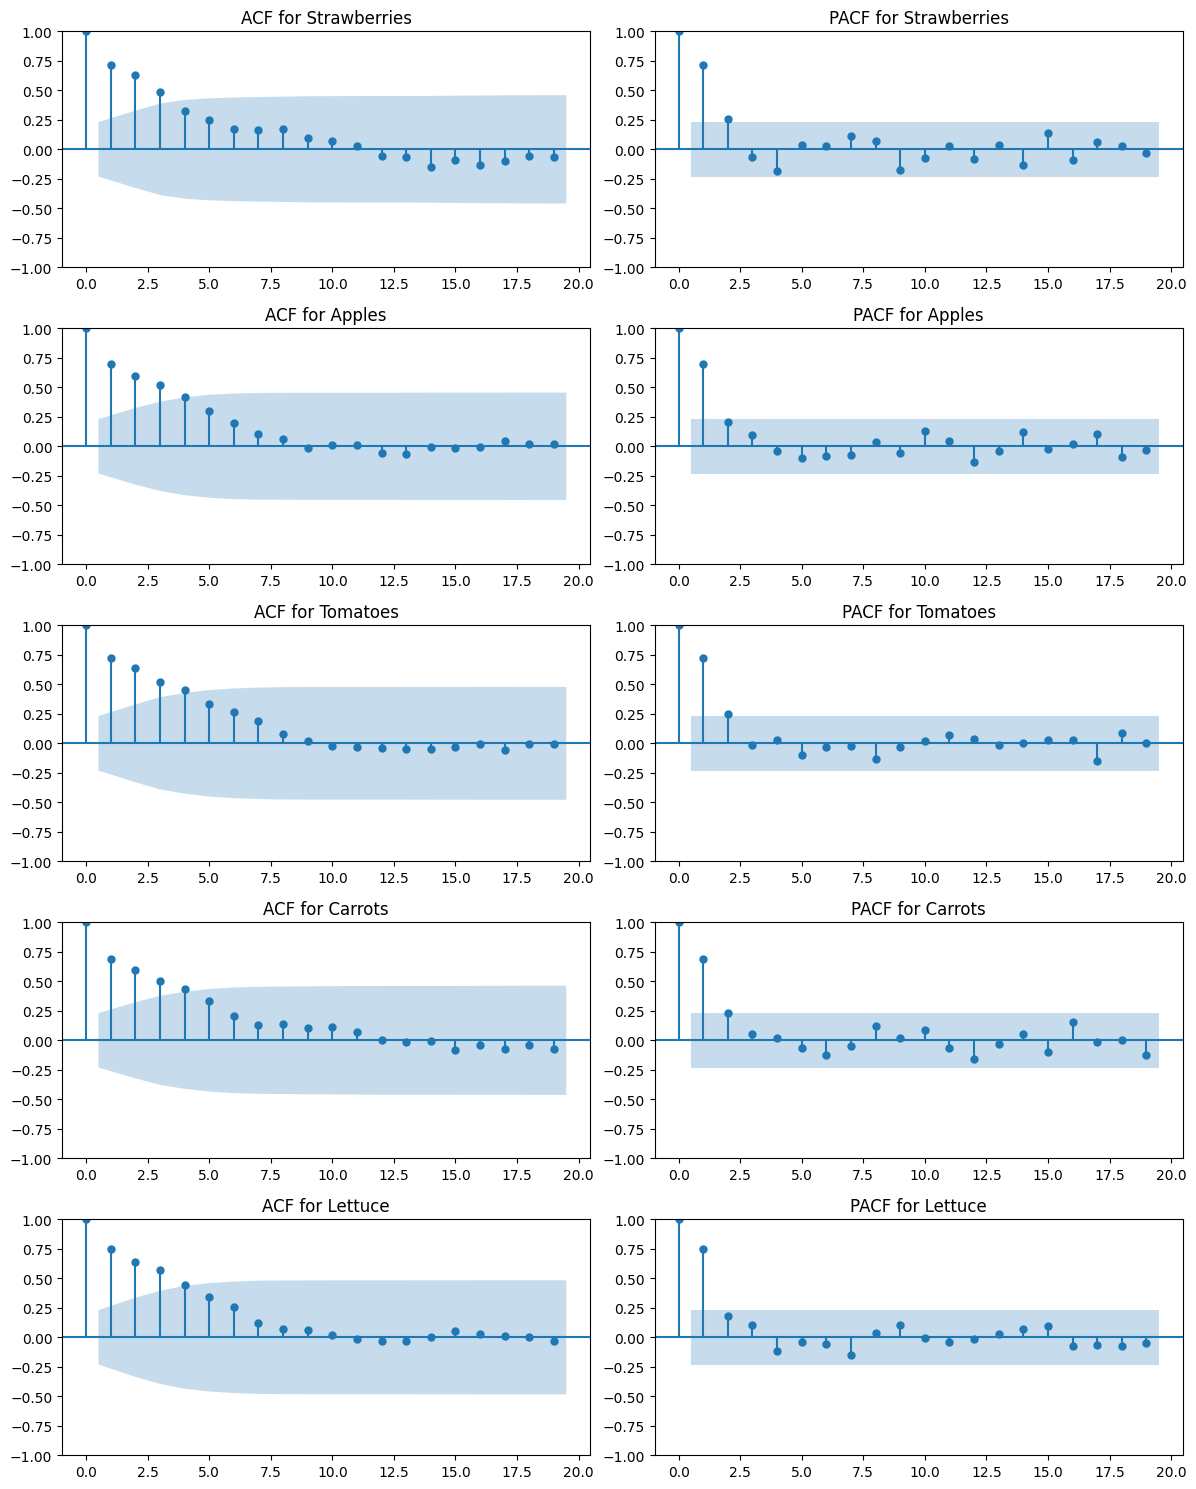

In [33]:
fig, ax = plt.subplots(len(products), 2, figsize=(12,15))

for i, product in enumerate(products):
    product_data = pd.concat([train_data[product],test_data[product]])

    # Plot ACF
    acf_plot = plot_acf(product_data['Quantity_Sold'],
                        ax=ax[i, 0],
                        title=f'ACF for {product}')

    # Plot PACF
    pacf_plot = plot_pacf(product_data['Quantity_Sold'],
                          ax=ax[i, 1],
                          title=f'PACF for {product}')

plt.tight_layout()
plt.show()

### Build the models and evaluate them

In [34]:
mae, rmse, mape, = 0, 0, 0
arima_mape_scores = dict()

arima_forecasts = dict()

for product in products:
    train = train_data[product]['Quantity_Sold']
    test = test_data[product]['Quantity_Sold']

    model = ARIMA(train, order=(1, 0, 1))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test))
    arima_forecasts[product] = forecast

    product_mae = mean_absolute_error(test,forecast)
    product_rmse = mean_squared_error(test, forecast,squared=False)
    product_mape = mean_absolute_percentage_error(test,forecast)*100

    mae += product_mae
    rmse += product_rmse
    mape += product_mape

    arima_mape_scores[product] = product_mape

n_products = len(products)

mae /= n_products
rmse /= n_products
mape /= n_products

print(f'MAE:', mae)
print(f'RMSE:', rmse)
print(f'MAPE:', mape)


MAE: 16272.29508003398
RMSE: 22695.230908184963
MAPE: 122.24822978490567


### Plot the train and test and forecast sets

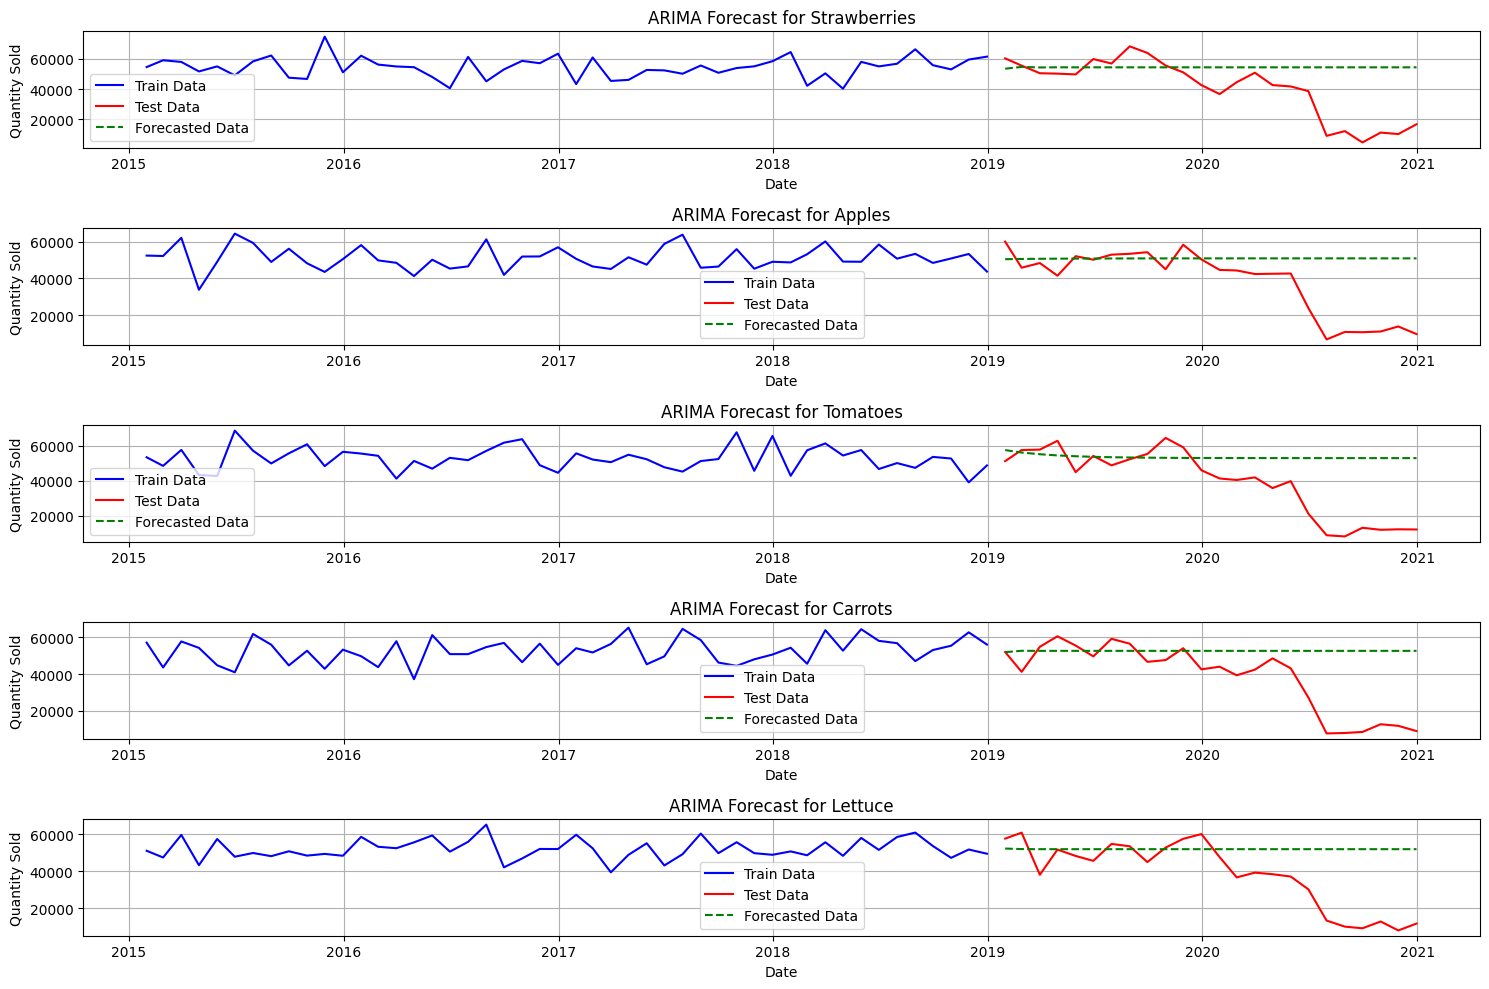

In [35]:
plt.figure(figsize=(15, 10))

for i, product in enumerate(products):
  plt.subplot(n_products, 1, i+1)

  plt.plot(train_data[product]['Date'],
           train_data[product]['Quantity_Sold'],
           label='Actual Quantity_Sold (Train Data)',
           color='blue')

  plt.plot(test_data[product]['Date'],
           test_data[product]['Quantity_Sold'],
           label='Actual Quantity_Sold (Test Data)',
           color='red')

  plt.plot(test_data[product]['Date'],
           arima_forecasts[product],
           label='Forecasted Quantity to be sold (ARIMA)',
           color='green',
           linestyle='--')

  plt.title(f'ARIMA Forecast for {product}')
  plt.xlabel('Date')
  plt.ylabel('Quantity Sold')
  plt.legend(['Train Data','Test Data','Forecasted Data'])
  plt.grid(True)

plt.tight_layout()
plt.show()

### Forecasting with Prophet


- With prophet , we will train and evaluate the model

In [36]:
mae, rmse, mape, = 0, 0, 0

prophet_model = dict()

prophet_forecasts = dict()

prophet_mape_scores = dict()

for product in products:
    train = train_data[product][['Date','Quantity_Sold']]
    test = test_data[product][['Date','Quantity_Sold']]

    train.columns = ['ds','y']
    test.columns = ['ds','y']

    model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model_prophet.fit(train)

    prophet_model[product] = model_prophet

    future_dates = model_prophet.make_future_dataframe(periods=len(test),freq='M')

    all_forecast = model_prophet.predict(future_dates)

    prophet_forecasts[product] = all_forecast

    test_forecast = all_forecast[-len(test):]

    product_mae = mean = mean_absolute_error(test['y'],test_forecast['yhat'])
    product_rmse = mean_squared_error(test['y'],test_forecast['yhat'],squared=False)
    product_mape = mean_absolute_percentage_error(test['y'],test_forecast['yhat'])*100
    prophet_mape_scores[product] = product_mape

    mae += product_mae
    rmse += product_rmse
    mape += product_mape

mae /= n_products
rmse /= n_products
mape /= n_products

print(f'\nMAE:', mae)
print(f'RMSE:', rmse)
print(f'MAPE:', mape)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59h5dt_w/w5yu6a12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59h5dt_w/6d60hf9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15092', 'data', 'file=/tmp/tmp59h5dt_w/w5yu6a12.json', 'init=/tmp/tmp59h5dt_w/6d60hf9g.json', 'output', 'file=/tmp/tmp59h5dt_w/prophet_modelfilk5vtn/prophet_model-20241002102239.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/


MAE: 17718.14171535949
RMSE: 24130.69256732845
MAPE: 128.46095602716426


### Visualization

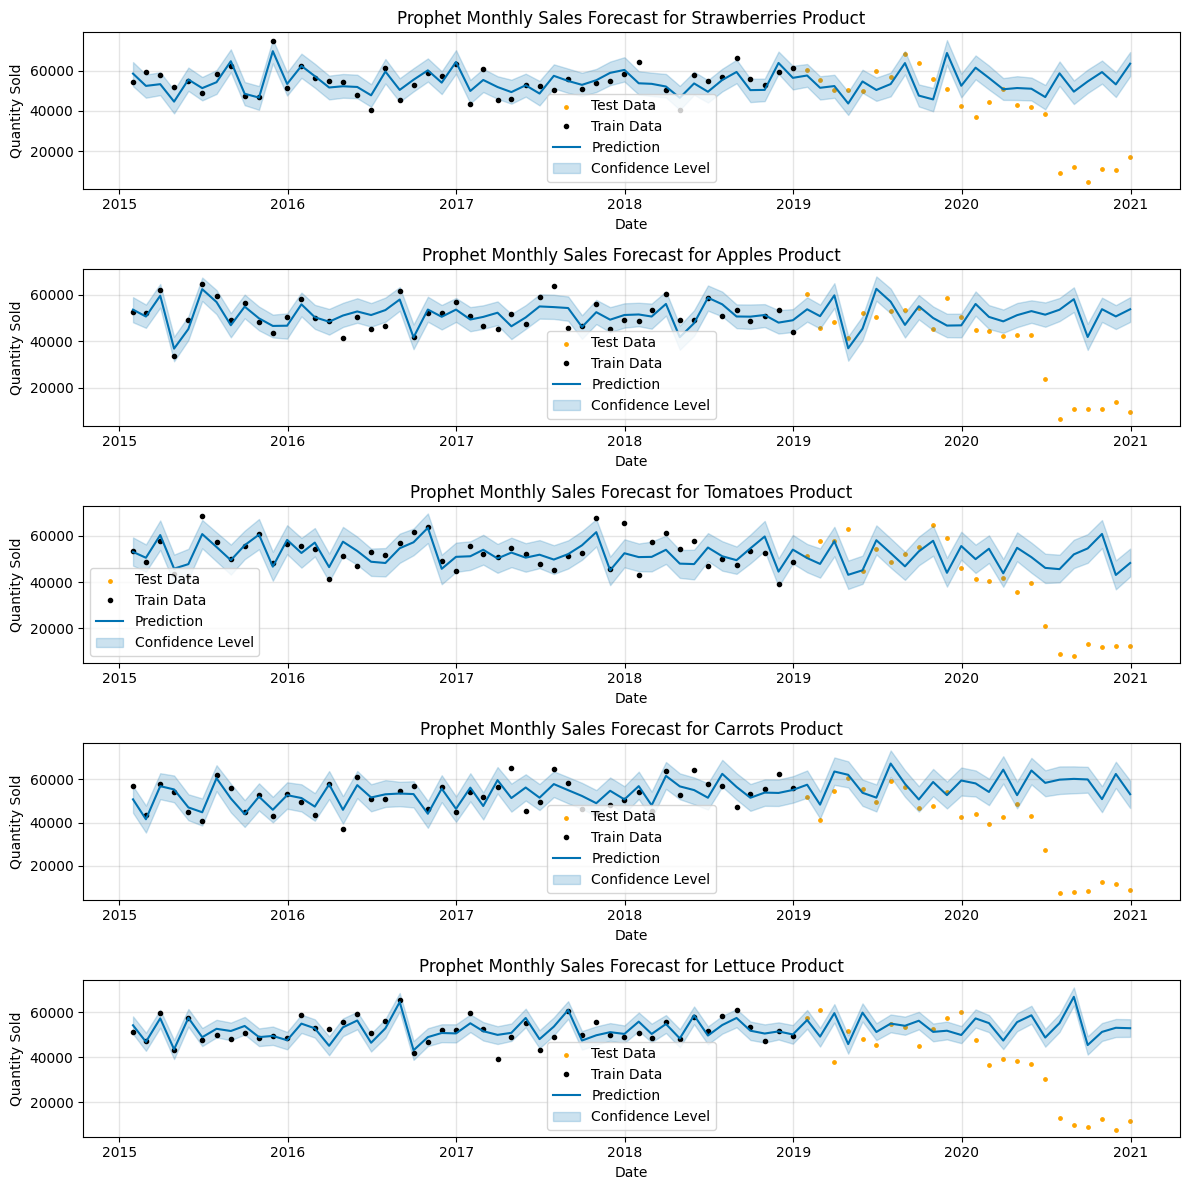

In [37]:
fig, ax = plt.subplots(n_products,1,figsize=(12,12))

for i, product in enumerate(products):
    ax[i].scatter(test_data[product]['Date'],
                  test_data[product]['Quantity_Sold'],
                  color= 'orange',
                  s= 6)
    category_plot = prophet_model[product].plot(prophet_forecasts[product],
                                                 ax=ax[i],
                                                 figsize=(12,6))
    ax[i].set_title(f'Prophet Monthly Sales Forecast for {product} Product')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Quantity Sold')

    ax[i].legend(['Test Data','Train Data', 'Prediction','Confidence Level'])

plt.tight_layout()
plt.show()

#### RANOM FOREST REGRESSION

- Forecasting with the RandomForestRegresso

In [38]:
mae, rmse, mape, = 0, 0, 0

rf_mape_scores = dict()

rf_x_train_dates = dict()
rf_x_test_dates= dict()
rf_x_train_dates = dict()
rf_x_test = dict()
rf_y_train = dict()
rf_y_test = dict()
rf_forecasts = dict()

for product in products:
  df_product = df[df['Product'] == product]

  df_product = pd.get_dummies(df_product, drop_first=True)

  df_product = df_product.set_index('Date').resample('M').sum().reset_index()

  df_product['Year'] = df_product['Date'].dt.year
  df_product['Month'] = df_product['Date'].dt.month
  df_product['Day'] = df_product['Date'].dt.day
  df_product['WeekOfYear'] = df_product['Date'].dt.isocalendar().week

  train = df_product[df_product['Year'] < 2019].reset_index()
  test = df_product[df_product['Year'] >= 2019].reset_index()

  rf_x_train_dates[product] = train['Date']
  rf_x_test_dates[product] = test['Date']

  train = train.drop(columns=['Date'])
  test = test.drop(columns=['Date'])

  x_train = train.drop(columns=['Quantity_Sold', 'Revenue'])
  y_train = train['Quantity_Sold']

  x_test = test.drop(columns=['Quantity_Sold', 'Revenue'])
  y_test = test['Quantity_Sold']

  rf_y_train[product] = y_train
  rf_y_test[product] = y_test

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(x_train, y_train)

  forecast = model.predict(x_test)
  rf_forecasts[product] = forecast

  product_mae = mean_absolute_error(y_test,forecast)
  product_rmse = mean_squared_error(y_test, forecast,squared=False)
  product_mape = mean_absolute_percentage_error(y_test,forecast)*100
  rf_mape_scores[product] = product_mape

  mae += product_mae
  rmse += product_rmse
  mape += product_mape

mae /= n_products
rmse /= n_products
mape /= n_products

print(f'MAE:', mae)
print(f'RMSE:', rmse)
print(f'MAPE:', mape)






MAE: 9922.106645162427
RMSE: 15810.178888863516
MAPE: 84.49983580709309


  ### Visualization

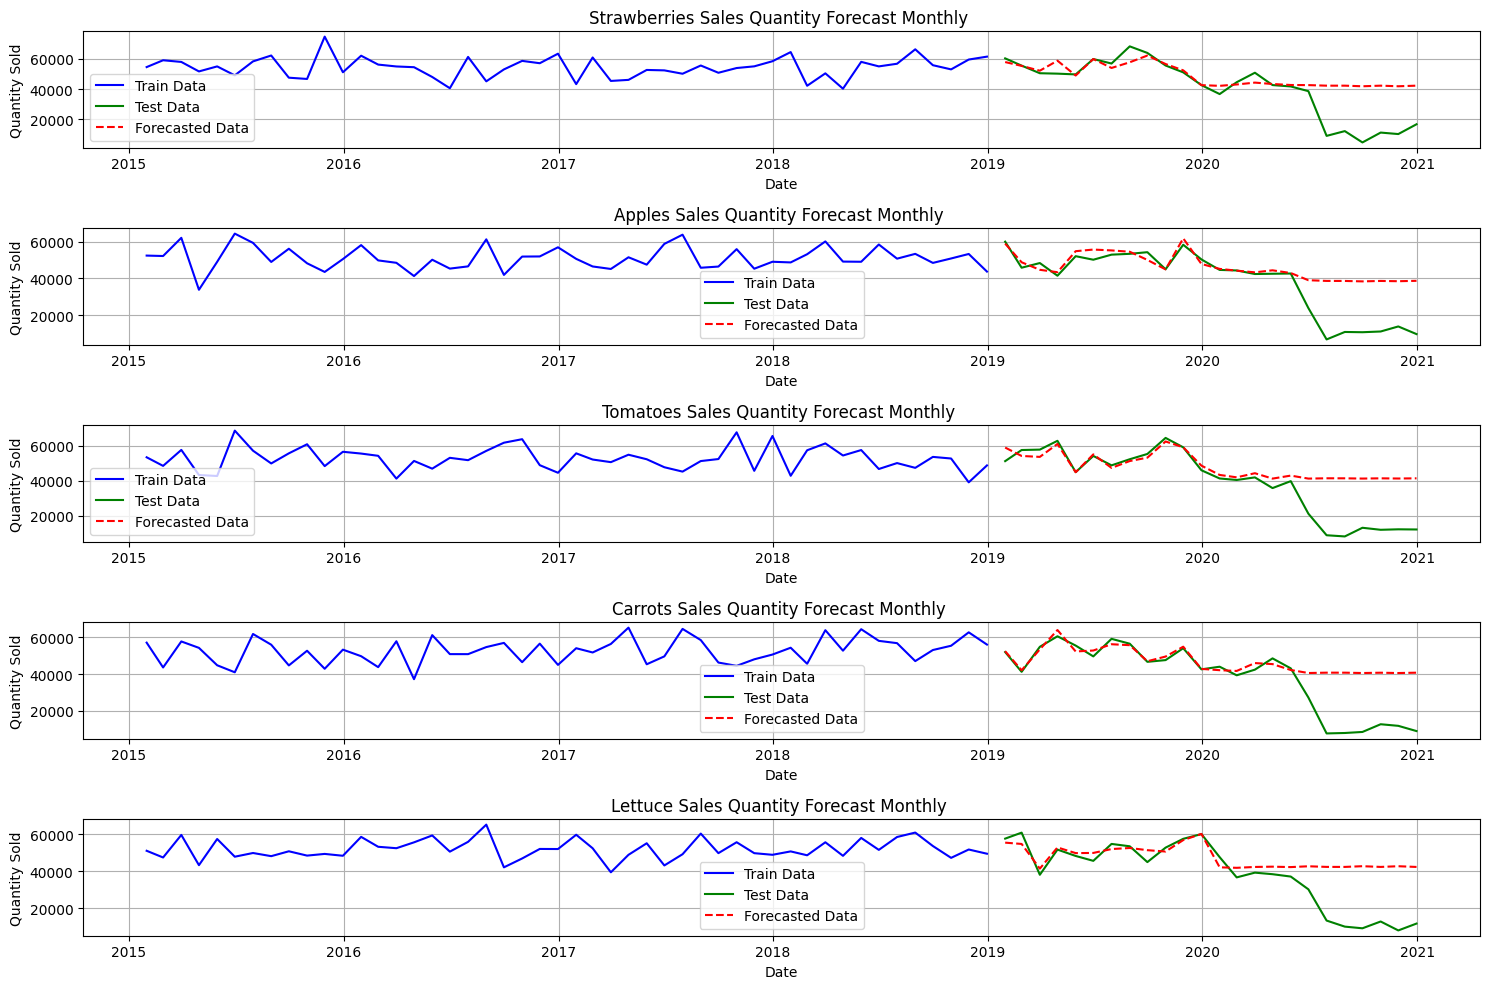

In [39]:
plt.figure(figsize=(15, 10))

for i, product in enumerate(products):
  plt.subplot(n_products, 1, i+1)

  plt.plot(rf_x_train_dates[product],
           rf_y_train[product],
           label='Actual Quantity_Sold (Train Data)',
           color='blue')

  plt.plot(rf_x_test_dates[product],
           rf_y_test[product],
           label='Actual Quantity_Sold (Test Data)',
           color='green')

  plt.plot(rf_x_test_dates[product],
           rf_forecasts[product],
           label='Forecasted Quantity to be sold (Random Forest)',
           color='red',
           linestyle='--')

  plt.title(f'{product} Sales Quantity Forecast Monthly ')
  plt.xlabel('Date')
  plt.ylabel('Quantity Sold')
  plt.legend(['Train Data','Test Data','Forecasted Data'])
  plt.grid(True)

plt.tight_layout()
plt.show()

### Conclution

In [40]:
arima_mape_scores['==Average=='] = np.mean([v for k,v in arima_mape_scores.items()])
prophet_mape_scores['==Average=='] = np.mean([v for k,v in prophet_mape_scores.items()])
rf_mape_scores['==Average=='] = np.mean([v for k,v in rf_mape_scores.items()])

pd.DataFrame({'ARIMA' : arima_mape_scores,
              'Prophet': prophet_mape_scores,
              'RandomForestRegressor': rf_mape_scores})



,ARIMA,Prophet,RandomForestRegressor
Strawberries,132.756353,137.883111,91.632361
Apples,114.566043,120.042669,76.848235
Tomatoes,117.775198,110.519397,80.081226
Carrots,131.315253,150.798011,90.074370
Lettuce,114.828302,123.061592,83.862987
==Average==,122.248230,128.460956,84.499836


# Model Report

ARIMA: This model performed well, particularly for Apples and Lettuce. Suggest using ARIMA for short-term forecasting of these products.


Prophet: This model offers good flexibility and handles seasonality well. Recommend using Prophet where longer-term predictions and understanding trends are important.

Random Forest: This model can provide insights into the factors driving sales. Use Random Forest to understand feature importance and potentially improve longer-term forecasting.

# Recommendations

Reduce waste: By optimizing harvest schedules and accurately predicting demand, the company aims to minimize overproduction and spoilage, leading to less waste.

Increase profits: Improved forecasting and optimized distribution can lead to better inventory management, reduced transportation costs, and potentially even premium pricing for fresh produce, ultimately boosting profitability.

Optimize harvest schedules: Aligning harvest schedules with predicted demand ensures efficient resource utilization and minimizes the risk of under- or over-harvesting.

Improve distribution: Efficient transportation routes and delivery schedules ensure timely delivery of fresh produce to customers while minimizing costs.